In [1]:
import pandas as pd
import numpy as np
import re
import time
from cvxopt import matrix, solvers

In [2]:
!pip install cvxopt

In [3]:
data=pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
exclude='!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~'
def clean(text):
    text=text.lower()
    pattern = re.compile('<.*?>')
    text=pattern.sub(r'', text)
    pattern = re.compile(r'https?://\S+|www\.\S+')
    text=pattern.sub(r'', text)
    for char in exclude:
        text = text.replace(char,' ')
    return text

In [5]:
df=data.sample(20000,ignore_index=True)

In [6]:
df['review'] = df['review'].apply(clean)

In [7]:
df

,review,sentiment
0,i came at this film with high expectations i ...,negative
1,this movies made me suffer and i loved it lov...,positive
2,i have to say krasinski is the only reason i ...,negative
3,i felt this movie was as much about human sexu...,positive
4,i remembered the title so well to me it was ...,negative
...,...,...
19995,vovochka is your everyday hooligan vs authorit...,negative
19996,katherine heigl marley shelton denise richar...,positive
19997,myself and my groovadelic 20 something pals ju...,positive
19998,typically kids films have some annoying qua...,positive


In [8]:
df['sentiment']=np.where(df['sentiment']=='positive',1,-1)

In [9]:
df

,review,sentiment
0,i came at this film with high expectations i ...,-1
1,this movies made me suffer and i loved it lov...,1
2,i have to say krasinski is the only reason i ...,-1
3,i felt this movie was as much about human sexu...,1
4,i remembered the title so well to me it was ...,-1
...,...,...
19995,vovochka is your everyday hooligan vs authorit...,-1
19996,katherine heigl marley shelton denise richar...,1
19997,myself and my groovadelic 20 something pals ju...,1
19998,typically kids films have some annoying qua...,1


In [10]:
d=''.join(df['review'].tolist())

In [11]:
X=d.split()
X

['i',
 'came',
 'at',
 'this',
 'film',
 'with',
 'high',
 'expectations',
 'i',
 'was',
 'aware',
 'of',
 "greenaway's",
 'work',
 'and',
 "'the",
 "tempest'",
 'and',
 'was',
 'interested',
 'in',
 'an',
 'adaptation',
 'i',
 'first',
 'wanted',
 'to',
 'switch',
 'off',
 'after',
 'ten',
 'minutes',
 'but',
 'felt',
 'that',
 'it',
 'would',
 'be',
 'unfair',
 'there',
 'was',
 'a',
 'representation',
 'of',
 'a',
 'storm',
 'but',
 'where',
 'in',
 'your',
 'mind',
 'do',
 'you',
 'conceive',
 'a',
 'small',
 'boy',
 'peeing',
 'over',
 'a',
 'toy',
 'boat',
 'it',
 'is',
 'symbolic',
 'of',
 'what',
 'i',
 'continued',
 'another',
 'ten',
 'minutes',
 'my',
 'finger',
 'twitching',
 'over',
 'the',
 "'off'",
 'button',
 'somewhere',
 'something',
 'would',
 'capture',
 'my',
 'interest',
 'this',
 'is',
 'not',
 'shakespeare',
 'it',
 'is',
 'not',
 'cinema',
 'there',
 'is',
 'a',
 'time',
 'and',
 'place',
 'for',
 'it',
 'but',
 'i',
 'will',
 'not',
 'waste',
 'my',
 'time',
 

In [12]:
def dupremove(l):
  s=dict.fromkeys(l)
  return list(s)

In [13]:
Vocabulary=dupremove(X)
print(len(Vocabulary))
Vocabulary

83138


['i',
 'came',
 'at',
 'this',
 'film',
 'with',
 'high',
 'expectations',
 'was',
 'aware',
 'of',
 "greenaway's",
 'work',
 'and',
 "'the",
 "tempest'",
 'interested',
 'in',
 'an',
 'adaptation',
 'first',
 'wanted',
 'to',
 'switch',
 'off',
 'after',
 'ten',
 'minutes',
 'but',
 'felt',
 'that',
 'it',
 'would',
 'be',
 'unfair',
 'there',
 'a',
 'representation',
 'storm',
 'where',
 'your',
 'mind',
 'do',
 'you',
 'conceive',
 'small',
 'boy',
 'peeing',
 'over',
 'toy',
 'boat',
 'is',
 'symbolic',
 'what',
 'continued',
 'another',
 'my',
 'finger',
 'twitching',
 'the',
 "'off'",
 'button',
 'somewhere',
 'something',
 'capture',
 'interest',
 'not',
 'shakespeare',
 'cinema',
 'time',
 'place',
 'for',
 'will',
 'waste',
 'no',
 'studies',
 'twenty',
 'five',
 'gave',
 'up',
 'end',
 'then',
 'read',
 'all',
 'comments',
 'on',
 'website',
 'pretentiousness',
 'only',
 'matched',
 'by',
 'its',
 'defendants',
 "'its",
 'painting',
 'put',
 "gallery'",
 "'it's",
 'ballet',
 

In [14]:
def counter(X):
    dic={}
    for item in X:
        if (item in dic):
            dic[item]+=1
        else:
            dic[item]=1
    return dic
dic=counter(X)

In [15]:
V=sorted(dic.items(), key=lambda item: item[1],reverse=True)
Vocabulary_reduce=list(dict(V[:300]).keys())
Vocabulary_reduce

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that',
 'was',
 'as',
 'movie',
 'with',
 'for',
 'but',
 'film',
 'on',
 'you',
 'not',
 'are',
 'his',
 'have',
 'one',
 'be',
 'he',
 'at',
 'all',
 'by',
 'an',
 'they',
 'so',
 'who',
 'like',
 'from',
 'or',
 'just',
 'about',
 'out',
 "it's",
 'if',
 'her',
 'has',
 'there',
 'some',
 'what',
 'good',
 'more',
 'very',
 'when',
 'up',
 'time',
 'even',
 'no',
 'my',
 'would',
 'she',
 'really',
 'only',
 'story',
 'see',
 'which',
 'their',
 'can',
 'had',
 'me',
 'well',
 'were',
 'much',
 'we',
 'than',
 'bad',
 'other',
 'been',
 'also',
 'do',
 'get',
 'great',
 'will',
 'how',
 'people',
 'because',
 'into',
 'first',
 'him',
 'most',
 "don't",
 'them',
 'made',
 'make',
 'its',
 'then',
 'way',
 'could',
 'too',
 'movies',
 'any',
 'after',
 'characters',
 'think',
 'watch',
 'films',
 'seen',
 'many',
 'character',
 'two',
 'being',
 'plot',
 'never',
 'acting',
 'life',
 'did',
 'where',
 'little',

In [16]:
corpus=[]
for i in range(df.shape[0]):
    corpus.append(df.review[i].split())

# Count frequency encoding

In [17]:
def frequency(corpus,Vocabulary):
    matrix=np.zeros((len(corpus),len(Vocabulary)))
    for c in range(len(corpus)):
        for v in range(len(Vocabulary)):
            matrix[c][v]=corpus[c].count(Vocabulary[v])
    return matrix

In [18]:
id_t=int(len(corpus)*0.8)
id_t

16000

In [19]:
X_train,X_test,Y_train,Y_test=corpus[:id_t],corpus[id_t:],df['sentiment'][:id_t],df['sentiment'][id_t:]

In [20]:
start=time.time()
tfx_train=frequency(X_train,Vocabulary_reduce)
tfx_test=frequency(X_test,Vocabulary_reduce)
time.time()-start

16.339267253875732

In [21]:
tfx_train

array([[ 9., 10.,  9., ...,  0.,  0.,  0.],
       [ 7.,  3.,  3., ...,  0.,  0.,  0.],
       [ 3.,  6.,  3., ...,  0.,  0.,  0.],
       ...,
       [13.,  5.,  8., ...,  0.,  0.,  0.],
       [14.,  6.,  6., ...,  0.,  0.,  1.],
       [ 5.,  4.,  4., ...,  0.,  0.,  0.]])

In [22]:
tfx_train.shape

(16000, 300)

In [23]:
tfx_test

array([[ 9., 10.,  6., ...,  0.,  0.,  0.],
       [ 9.,  3.,  6., ...,  0.,  0.,  0.],
       [18., 17., 10., ...,  0.,  1.,  0.],
       ...,
       [ 8.,  3.,  6., ...,  0.,  0.,  0.],
       [10.,  2.,  4., ...,  0.,  0.,  0.],
       [ 6.,  2.,  6., ...,  1.,  0.,  0.]])

In [24]:
tfx_test.shape

(4000, 300)

# TF-IDF Vectorization

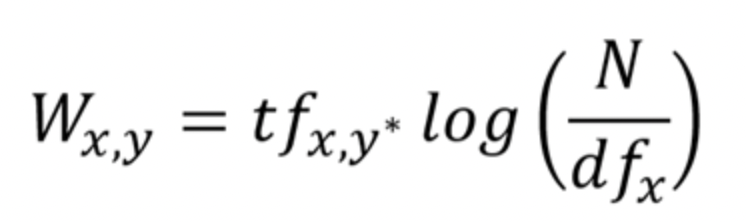

In [25]:
def dfx(corpus,Vocabulary):
    cpt=np.zeros(len(Vocabulary))
    for v in range(len(Vocabulary)):
        for c in corpus:
            if Vocabulary[v] in c:
                cpt[v]+=1
    return cpt
    

In [26]:
dfx_train=dfx(X_train,Vocabulary_reduce)
dfx_test=dfx(X_test,Vocabulary_reduce)

In [27]:
dfx_train

array([15859., 15460., 15435., 15155., 15044., 14279., 14032., 13636.,
       12310., 14464., 12692., 10272., 10173.,  9739., 11154., 11372.,
       11380.,  8793., 10026.,  8296.,  9472.,  8820.,  6795.,  9133.,
        9052.,  9039.,  6232.,  8202.,  8273.,  7470.,  7824.,  6586.,
        7454.,  7034.,  7390.,  7454.,  6589.,  6679.,  6642.,  6805.,
        5906.,  6881.,  4004.,  6342.,  6251.,  6122.,  6090.,  6075.,
        5771.,  5538.,  5717.,  5446.,  5586.,  5337.,  5149.,  5133.,
        5089.,  3232.,  4892.,  5268.,  4784.,  5142.,  4657.,  4488.,
        4983.,  4574.,  4629.,  4783.,  4324.,  4521.,  3495.,  4452.,
        3796.,  4244.,  4141.,  4128.,  4277.,  4243.,  3977.,  3882.,
        4091.,  3920.,  3936.,  4031.,  4078.,  3248.,  4111.,  3969.,
        3664.,  4031.,  3891.,  3230.,  3528.,  3790.,  3729.,  3570.,
        3390.,  3648.,  3565.,  3324.,  3450.,  3436.,  2905.,  3452.,
        3221.,  3002.,  3062.,  3213.,  3205.,  3224.,  3400.,  2884.,
      

In [28]:
N_train=tfx_train.shape[0]
N_test=tfx_test.shape[0]

In [29]:
tf_idf_train=tfx_train*np.log(N_train/dfx_train)
tf_idf_test=tfx_test*np.log(N_test/dfx_test)

In [30]:
tf_idf_train

array([[0.07966404, 0.34332679, 0.32355958, ..., 0.        , 0.        ,
        0.        ],
       [0.06196092, 0.10299804, 0.10785319, ..., 0.        , 0.        ,
        0.        ],
       [0.02655468, 0.20599607, 0.10785319, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11507028, 0.1716634 , 0.28760851, ..., 0.        , 0.        ,
        0.        ],
       [0.12392184, 0.20599607, 0.21570639, ..., 0.        , 0.        ,
        2.57373786],
       [0.0442578 , 0.13733072, 0.14380426, ..., 0.        , 0.        ,
        0.        ]])

In [31]:
tf_idf_test

array([[0.06548768, 0.33815348, 0.19978971, ..., 0.        , 0.        ,
        0.        ],
       [0.06548768, 0.10144605, 0.19978971, ..., 0.        , 0.        ,
        0.        ],
       [0.13097536, 0.57486092, 0.33298285, ..., 0.        , 2.66283786,
        0.        ],
       ...,
       [0.05821127, 0.10144605, 0.19978971, ..., 0.        , 0.        ,
        0.        ],
       [0.07276409, 0.0676307 , 0.13319314, ..., 0.        , 0.        ,
        0.        ],
       [0.04365845, 0.0676307 , 0.19978971, ..., 2.72952923, 0.        ,
        0.        ]])

In [32]:
Labels=df.iloc[:,-1]
tf_idf_train.shape

(16000, 300)

In [33]:
line, column= tf_idf_train.shape

In [34]:
Y_train.shape

(16000,)

In [35]:
def ComputeQ(X, Y):
    Y=np.array(Y).reshape(-1, 1)
    Xp=Y*X
    Q=Xp@Xp.T
    return Q

In [36]:
Q=ComputeQ(tf_idf_train, Y_train)

In [104]:
Q

array([[260.40369835, -14.5639043 ,  30.7343597 , ...,  27.63414001,
         33.62527516,  62.82891447],
       [-14.5639043 ,  77.88243456, -38.57160479, ..., -22.67125205,
        -12.51293634, -33.85719711],
       [ 30.7343597 , -38.57160479, 183.7915264 , ...,  44.88092456,
         42.14417085,  42.88399155],
       ...,
       [ 27.63414001, -22.67125205,  44.88092456, ..., 242.64016463,
         52.46341239,  56.44319008],
       [ 33.62527516, -12.51293634,  42.14417085, ...,  52.46341239,
        242.52503832,  49.14577618],
       [ 62.82891447, -33.85719711,  42.88399155, ...,  56.44319008,
         49.14577618, 246.06456884]])

Coefficient in cvxopt

In [38]:
#Converting into cvxopt format
P = matrix(Q)
q = matrix(-np.ones((line, 1)))
G = matrix(-np.eye(line))
h = matrix(np.zeros(line))
TT=np.array(Y_train).reshape(-1, 1).T
TT=TT.astype('float') 
A = matrix(TT)
b = matrix(np.zeros(1))
solvers.options['show_progress'] = False

finding the solution

In [39]:
solution=solvers.qp(P, q, G, h, A, b)
alpha=np.array(solution["x"])

In [56]:
alpha

array([[ 7566360.0564942 ],
       [ 9650425.06234698],
       [ 6657159.86373574],
       ...,
       [31703251.11284291],
       [28921686.25660988],
       [ 5204559.49780622]])

In [117]:
alpha.shape

(16000, 1)

In [118]:
tf_idf_train.shape

(16000, 300)

In [110]:
Y_train.shape

(16000,)

In [53]:
YY_train=np.array(Y_train).reshape(-1, 1).T

Deducing w and the bias b

In [54]:
w=alpha@YY_train@tf_idf_train

In [109]:
tf_idf_train[0].flatten().shape

(300,)

In [ ]:
b=YY_train-w.T@tf_idf_train

array([[-3.69048641e+11],
       [-4.70698754e+11],
       [-3.24702470e+11],
       ...,
       [-1.54632368e+12],
       [-1.41065306e+12],
       [-2.53851997e+11]])

In [125]:
import os

In [126]:
os.getcwd()

'/Users/gilda/Desktop/SVM'